# Human brain DFPLC (Visium) - semi-supervised clustering



In [ ]:
import spider
from spider import SPIDER

In [86]:
op=SPIDER()
import anndata
import pandas as pd
import scanpy as sc
from sklearn.metrics import adjusted_rand_score

In [4]:
data_name = '151673'
method_i = 'BayesSpace'

In [12]:
idata = anndata.read_h5ad(f'../example_data/human_brain_DLPFC/idata.h5ad')
idata

AnnData object with n_obs × n_vars = 7003 × 1253
    obs: 'A', 'B', 'A_row', 'A_col', 'B_row', 'B_col', 'A_label', 'B_label', 'A_label_int', 'B_label_int', 'label_1', 'label_2', 'label_int', 'label', 'row', 'col', 'dist', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_count', 'som_node'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'is_svi', 'label'
    uns: 'cell_meta', 'lr_meta'
    obsm: 'pattern_score'

In [74]:
op.util.scored_spot_interface(idata)

Added key cell_pattern in idata.uns


In [80]:
adata = anndata.read_h5ad('../example_data/human_brain_DLPFC/adata.h5ad')
adata

AnnData object with n_obs × n_vars = 3607 × 33538
    obs: 'barcode', 'sample_name', 'tissue', 'row', 'col', 'imagerow', 'imagecol', 'Cluster', 'height', 'width', 'sum_umi', 'sum_gene', 'subject', 'position', 'replicate', 'subject_position', 'discard', 'key', 'cell_count', 'SNN_k50_k4', 'SNN_k50_k5', 'SNN_k50_k6', 'SNN_k50_k7', 'SNN_k50_k8', 'SNN_k50_k9', 'SNN_k50_k10', 'SNN_k50_k11', 'SNN_k50_k12', 'SNN_k50_k13', 'SNN_k50_k14', 'SNN_k50_k15', 'SNN_k50_k16', 'SNN_k50_k17', 'SNN_k50_k18', 'SNN_k50_k19', 'SNN_k50_k20', 'SNN_k50_k21', 'SNN_k50_k22', 'SNN_k50_k23', 'SNN_k50_k24', 'SNN_k50_k25', 'SNN_k50_k26', 'SNN_k50_k27', 'SNN_k50_k28', 'GraphBased', 'Maynard', 'Martinowich', 'Layer', 'layer_guess', 'layer_guess_reordered', 'layer_guess_reordered_short', 'expr_chrM', 'expr_chrM_ratio', 'SpatialDE_PCA', 'SpatialDE_pool_PCA', 'HVG_PCA', 'pseudobulk_PCA', 'markers_PCA', 'SpatialDE_UMAP', 'SpatialDE_pool_UMAP', 'HVG_UMAP', 'pseudobulk_UMAP', 'markers_UMAP', 'SpatialDE_PCA_spatial', 'SpatialD

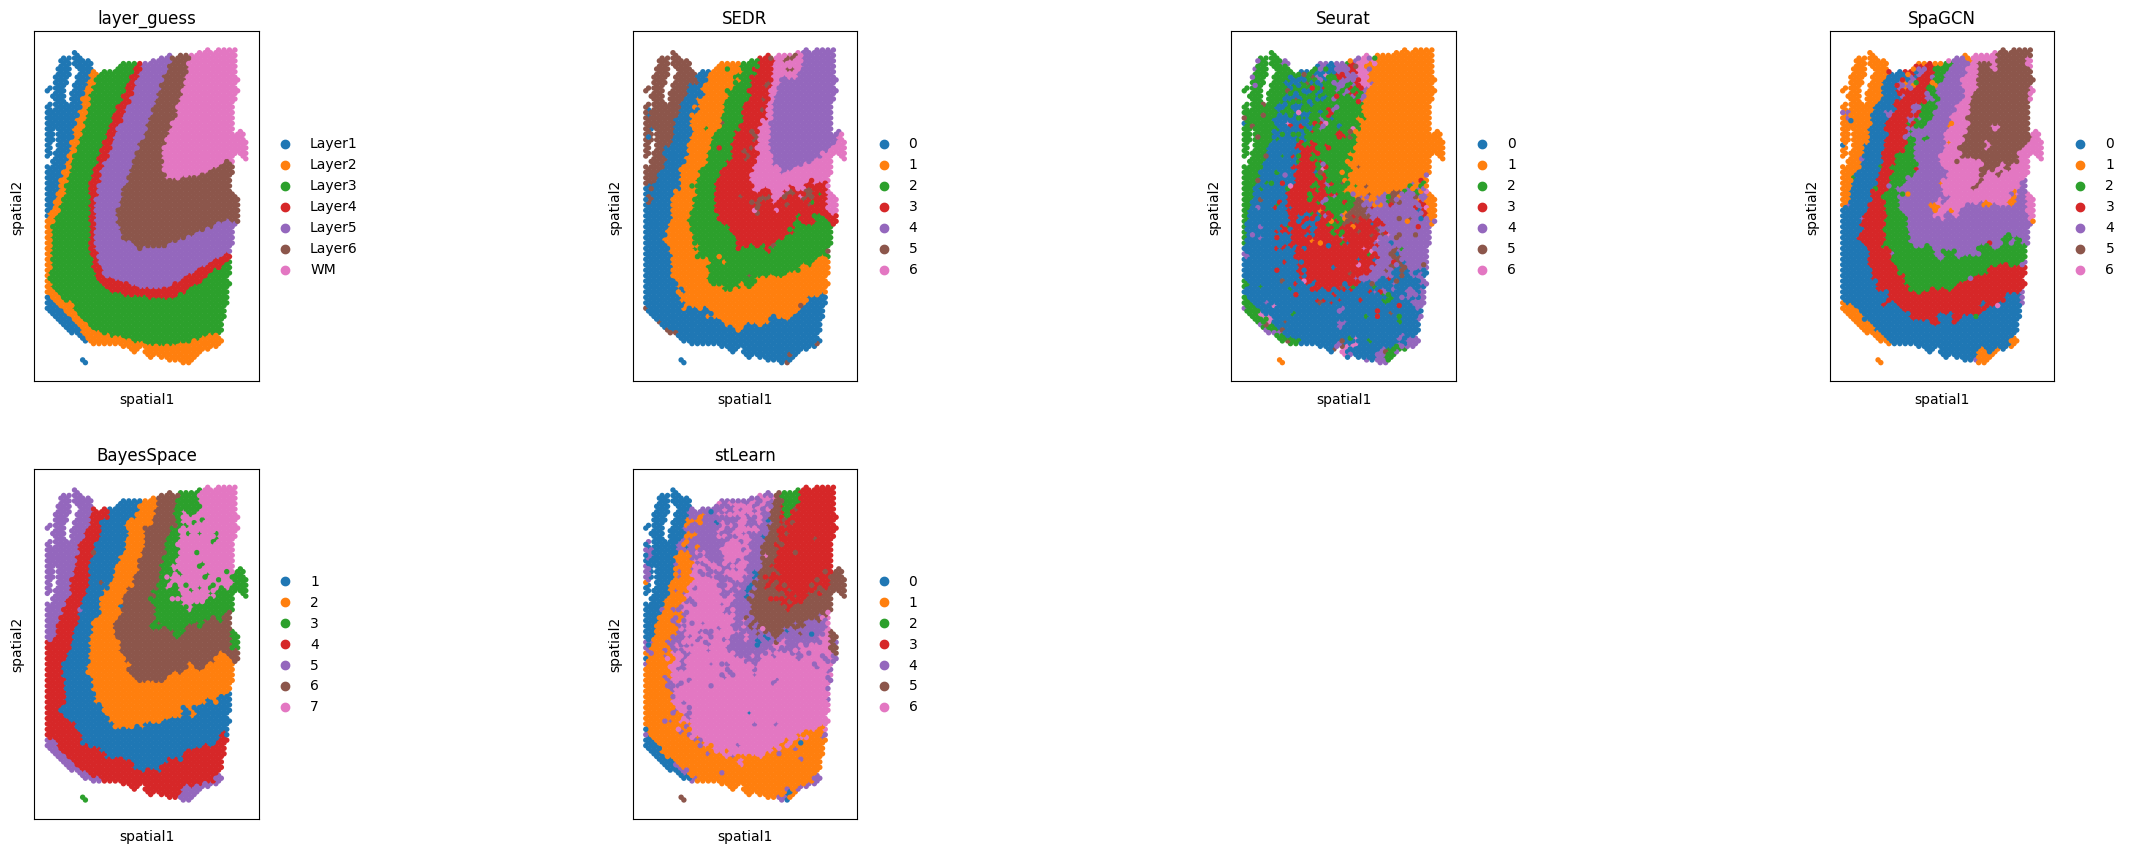

In [81]:
sc.pl.spatial(adata, color=['layer_guess', 'SEDR', 'Seurat', 'SpaGCN', 'BayesSpace', 'stLearn'], spot_size=2)

Added key label_SEDR in idata.obs


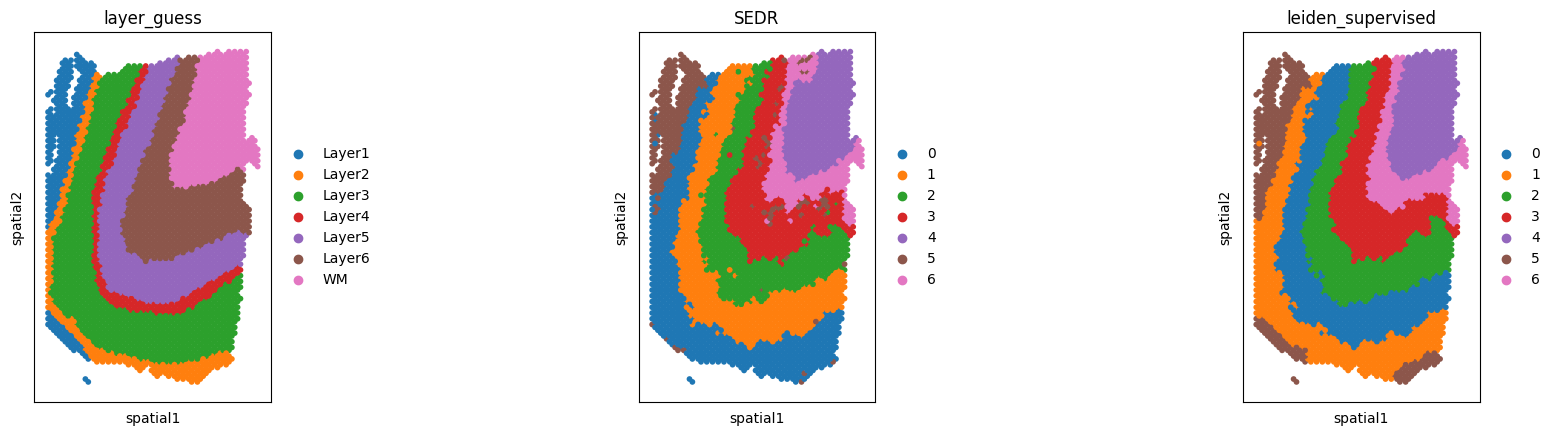

SPIDER ARI: 0.5548583214738552
SEDR ARI: 0.513966214145033


In [106]:
op.util.relabel_interface(idata, 'SEDR')
op.cl.supervised_spot_clust(idata, adata, label='SEDR', n_cluster=7)
sc.pl.spatial(adata, color=['layer_guess', 'SEDR', 'leiden_supervised'], spot_size=2)
print(f'SPIDER ARI: {adjusted_rand_score(adata.obs["layer_guess"], adata.obs["leiden_supervised"])}')
print(f'SEDR ARI: {adjusted_rand_score(adata.obs["layer_guess"], adata.obs["SEDR"])}')

Added key label_Seurat in idata.obs


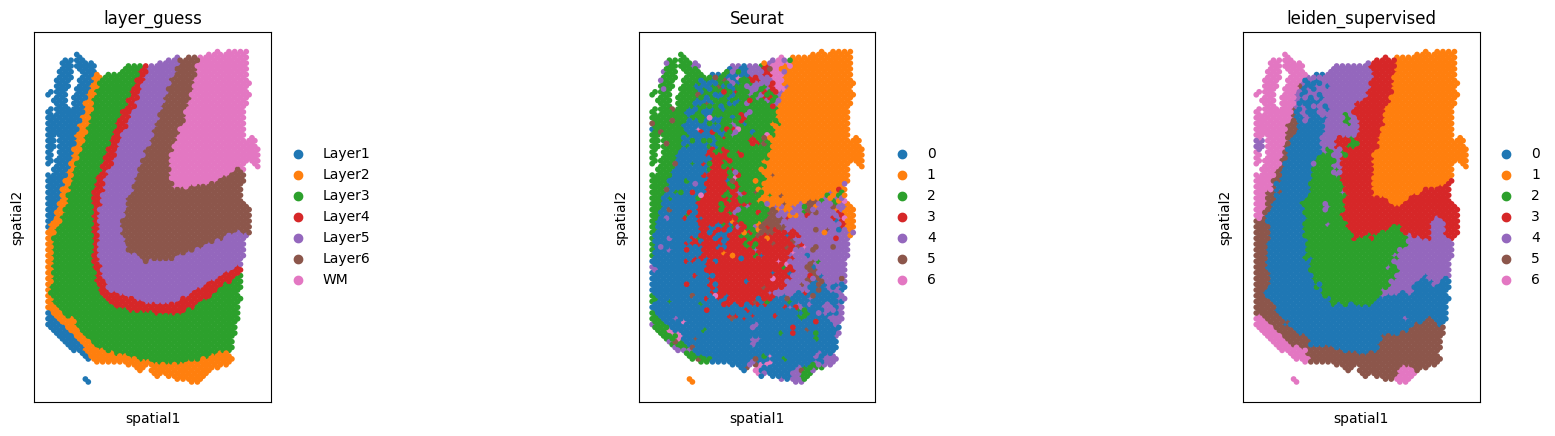

SPIDER ARI: 0.5206765042449075
Seurat ARI: 0.388255543520589


In [105]:
op.util.relabel_interface(idata, 'Seurat')
op.cl.supervised_spot_clust(idata, adata, label='Seurat', n_cluster=7)
sc.pl.spatial(adata, color=['layer_guess', 'Seurat', 'leiden_supervised'], spot_size=2)
print(f'SPIDER ARI: {adjusted_rand_score(adata.obs["layer_guess"], adata.obs["leiden_supervised"])}')
print(f'Seurat ARI: {adjusted_rand_score(adata.obs["layer_guess"], adata.obs["Seurat"])}')

Added key label_SpaGCN in idata.obs


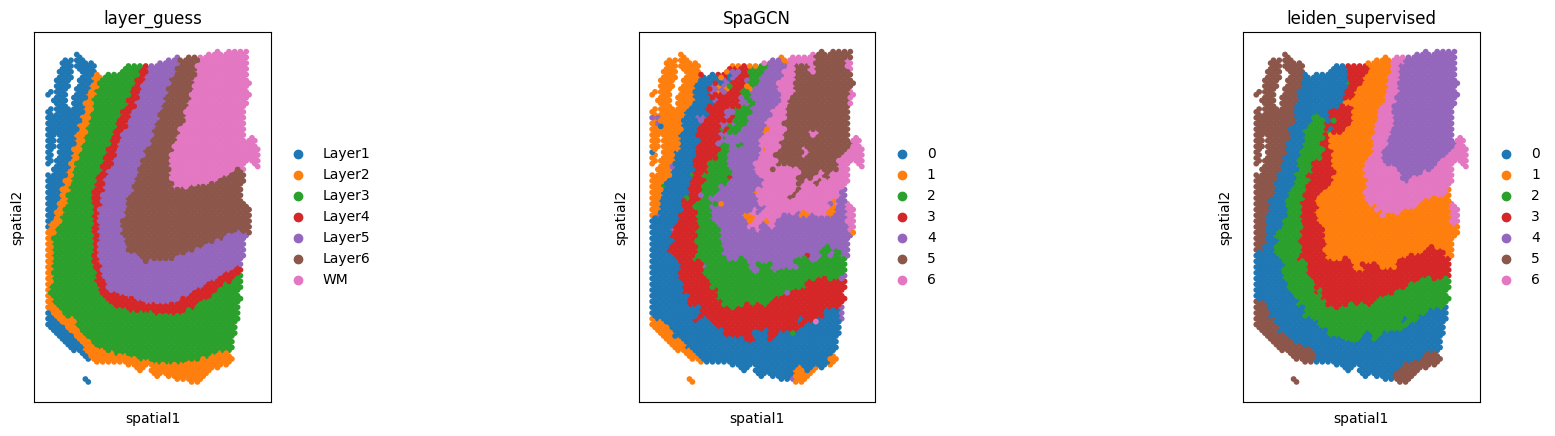

SPIDER ARI: 0.512486217605031
SpaGCN ARI: 0.4603270424008769


In [104]:
op.util.relabel_interface(idata, 'SpaGCN')
op.cl.supervised_spot_clust(idata, adata, label='SpaGCN', n_cluster=7)
sc.pl.spatial(adata, color=['layer_guess', 'SpaGCN', 'leiden_supervised'], spot_size=2)
print(f'SPIDER ARI: {adjusted_rand_score(adata.obs["layer_guess"], adata.obs["leiden_supervised"])}')
print(f'SpaGCN ARI: {adjusted_rand_score(adata.obs["layer_guess"], adata.obs["SpaGCN"])}')

Added key label_BayesSpace in idata.obs


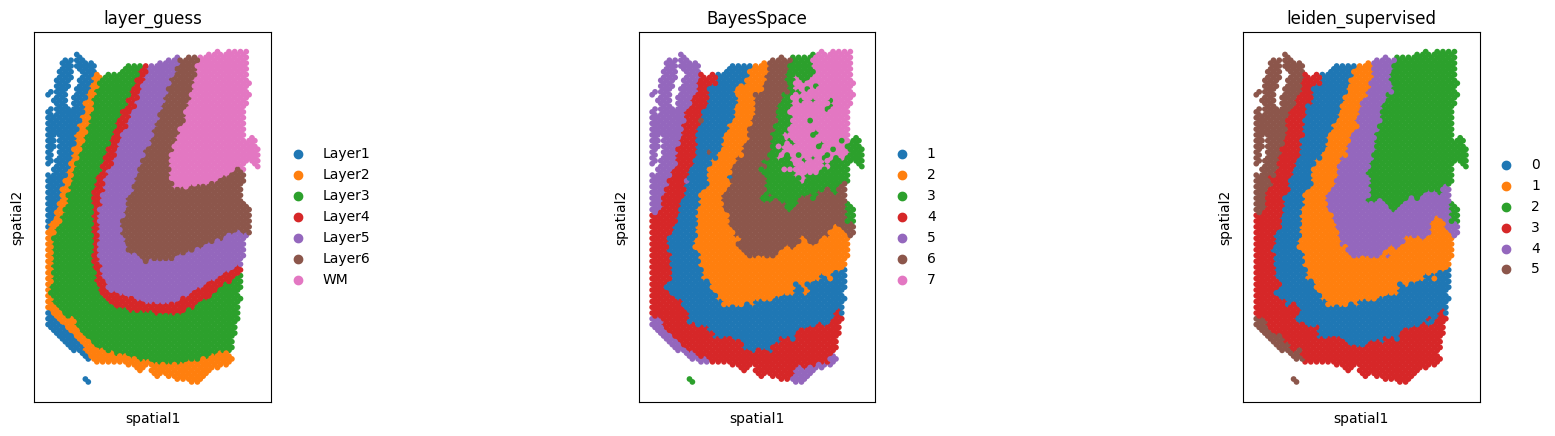

SPIDER ARI: 0.5586116467710605
BayesSpace ARI: 0.549251096636023


In [102]:
op.util.relabel_interface(idata, 'BayesSpace')
op.cl.supervised_spot_clust(idata, adata, label='BayesSpace', n_cluster=7)
sc.pl.spatial(adata, color=['layer_guess', 'BayesSpace', 'leiden_supervised'], spot_size=2)
print(f'SPIDER ARI: {adjusted_rand_score(adata.obs["layer_guess"], adata.obs["leiden_supervised"])}')
print(f'BayesSpace ARI: {adjusted_rand_score(adata.obs["layer_guess"], adata.obs["BayesSpace"])}')

Added key label_stLearn in idata.obs


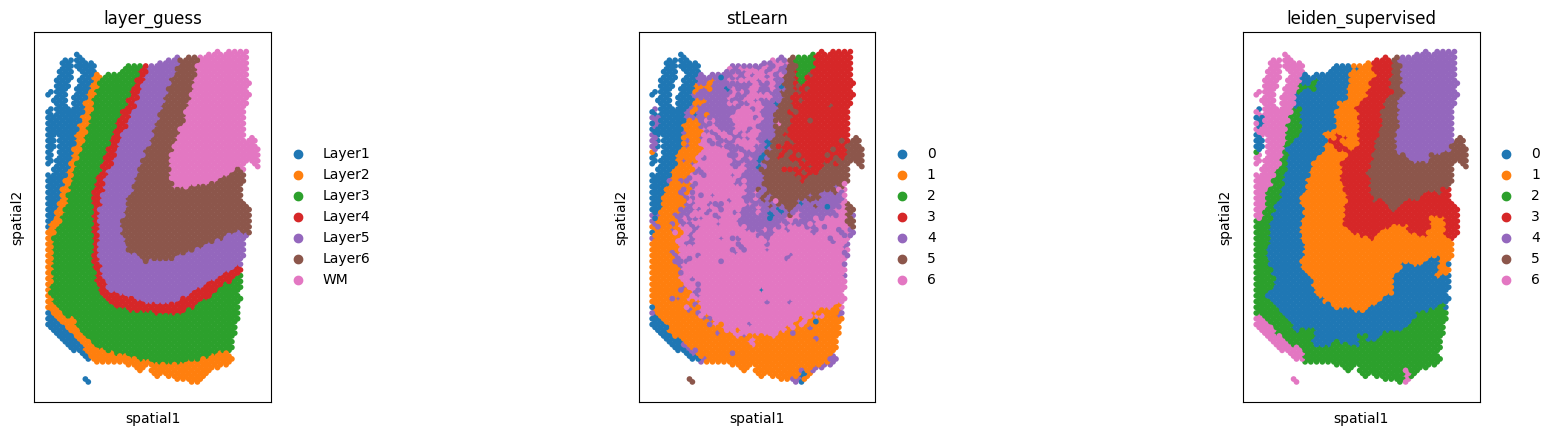

SPIDER ARI: 0.4902784495816616
stLearn ARI: 0.3045914036879907


In [103]:
op.util.relabel_interface(idata, 'stLearn')
op.cl.supervised_spot_clust(idata, adata, label='stLearn', n_cluster=7)
sc.pl.spatial(adata, color=['layer_guess', 'stLearn', 'leiden_supervised'], spot_size=2)
print(f'SPIDER ARI: {adjusted_rand_scsore(adata.obs["layer_guess"], adata.obs["leiden_supervised"])}')
print(f'stLearn ARI: {adjusted_rand_score(adata.obs["layer_guess"], adata.obs["stLearn"])}')